<a href="https://colab.research.google.com/github/Hachiman999/Colab-imagen/blob/master/interpolacion_transformacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab.patches import cv2_imshow
from google.colab import drive 

drive.mount('/content/drive')

#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
#path
path_dir='/content/drive/My Drive/Colab Notebooks/Imagen'
os.chdir(path_dir)

#graficar imagenes 
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Interpolacion


In [0]:
def mostrar3(a,b,c, titulo1 ="original", titulo2="original",titulo3="original"):
   plt.figure(figsize=(14,14))
   plt.subplot(221), plt.imshow(a), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(223), plt.imshow(c), plt.title(titulo3)
   plt.xticks([])
   plt.yticks([]) 
   plt.show()

def mostrar3_gris(a,b,c, titulo1 ="original", titulo2="original",titulo3="original"):
   plt.figure(figsize=(14,14))
   plt.subplot(221), plt.imshow(a,cmap='gray'), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(223), plt.imshow(c,cmap='gray'), plt.title(titulo3)
   plt.xticks([])
   plt.yticks([])
   plt.show()
    
def mostrar2(a,b, titulo1 ="original", titulo2="original"):
   plt.figure(figsize=(14,14))
   plt.subplot(221), plt.imshow(a), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.show()

def mostrar2_gris(a,b, titulo1 ="original", titulo2="original"):
   plt.figure(figsize=(14,14))
   plt.subplot(221), plt.imshow(a,cmap='gray'), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.show()
  
  
def redRGB (path):
  img = cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

/content


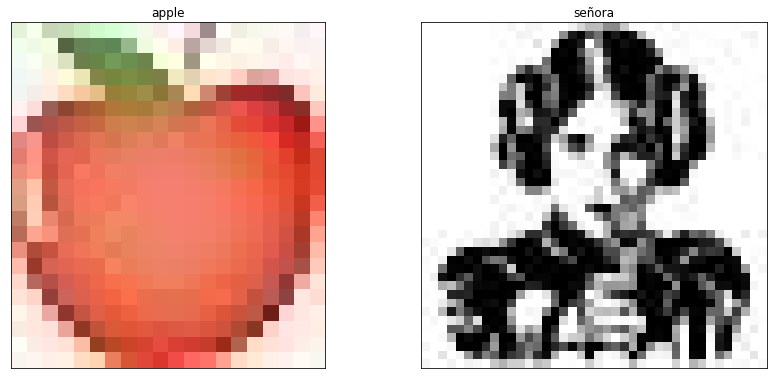

In [0]:
!pwd
imgA = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/apple20x22.jpg')
imgM = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/ico.jpg');
ner_imgA = cv2.resize(imgA, None, fx =5 , fy =5 , interpolation = cv2.INTER_NEAREST)
ner_imgB = cv2.resize(imgM, None, fx =5 , fy =5 , interpolation = cv2.INTER_NEAREST)
mostrar2(ner_imgA, ner_imgB,'apple','señora')

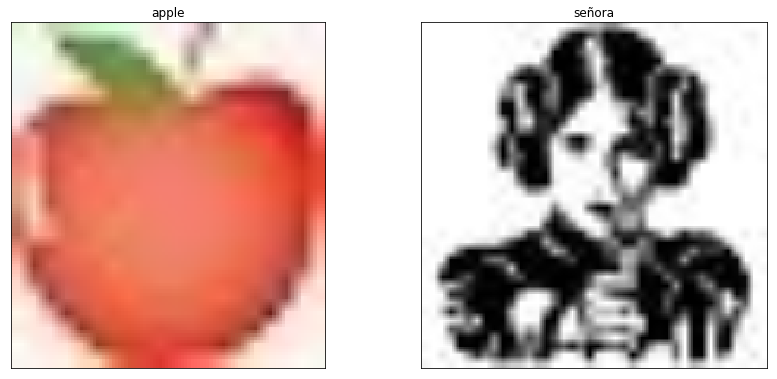

In [0]:
imgA = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/apple20x22.jpg')
imgM = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/ico.jpg')
ner_imgA = cv2.resize(imgA, None, fx =5 , fy =5 , interpolation = cv2.INTER_LINEAR)
ner_imgB = cv2.resize(imgM, None, fx =5 , fy =5 , interpolation = cv2.INTER_LINEAR)
mostrar2(ner_imgA, ner_imgB,'apple','señora')

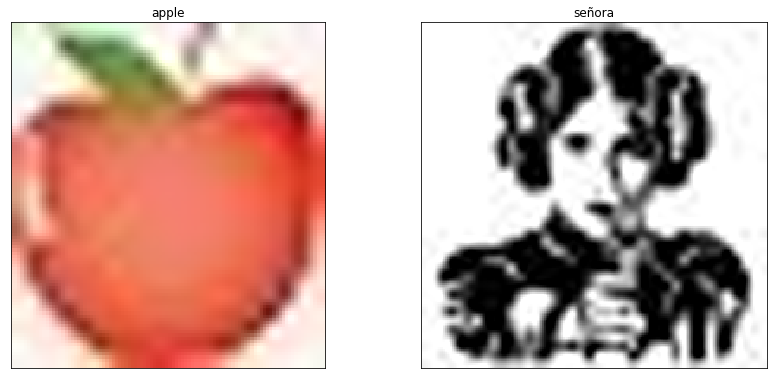

In [45]:
imgA = redRGB('apple20x22.jpg')
imgM = redRGB('ico.jpg')
ner_imgA = cv2.resize(imgA, None, fx =5 , fy =5 , interpolation = cv2.INTER_CUBIC)
ner_imgB = cv2.resize(imgM, None, fx =5 , fy =5 , interpolation = cv2.INTER_CUBIC)
mostrar2(ner_imgA, ner_imgB,'apple','señora')

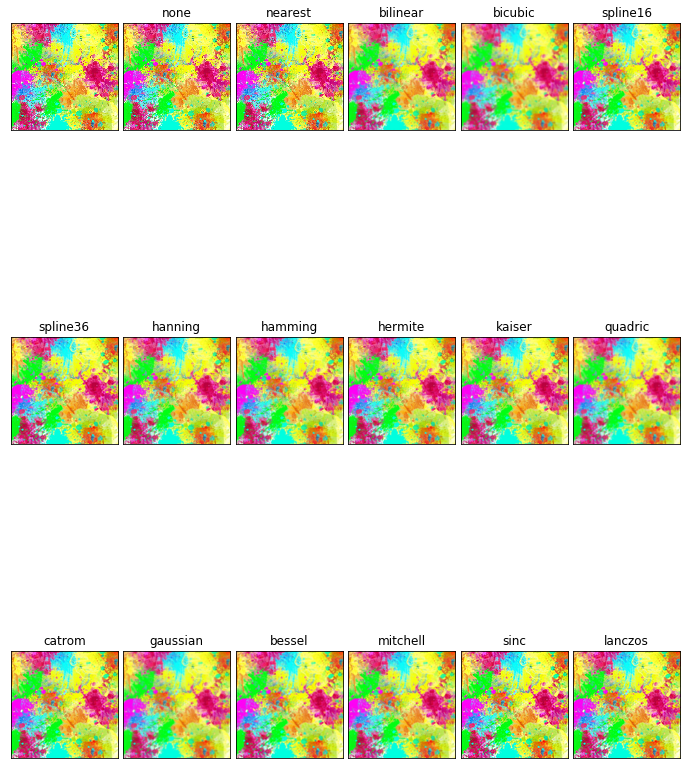

In [38]:
metodos = [None,  'none', 'nearest','bilinear', 'bicubic', 'spline16', 'spline36','hanning','hamming', 'hermite','kaiser','quadric', 'catrom', 'gaussian','bessel','mitchell','sinc','lanczos']
imgxx = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/mancha.jpg')
grid = imgxx


fig, axes = plt.subplots(3,6, figsize=(12,16), subplot_kw={'xticks' : [],'yticks' : []} )

fig.subplots_adjust(hspace = 0.3, wspace = 0.05)

for ax, interp_method in zip(axes.flat, metodos):
  ax.imshow(grid,interpolation=interp_method)
  ax.set_title(interp_method)
plt.show() 


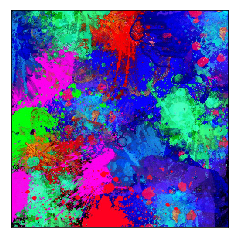

In [41]:
from PIL import Image

foto = Image.open('/content/drive/My Drive/Colab Notebooks/Imagen/mancha.jpg')

datos = list(foto.getdata())

datos_inver = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2])   for x in range(len(datos)) ]

img_inver = Image.new('RGB', foto.size)
img_inver.putdata(datos_inver)
plt.xticks([])
plt.yticks([])
plt.imshow(img_inver)


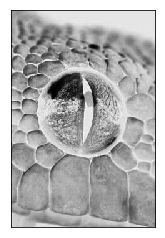

In [56]:




foto = Image.open('ojo.jpg')

datos = list(foto.getdata())

datos_inver = [255 - x   for x in datos ]

img_inver = Image.new('L', foto.size)
img_inver.putdata(datos_inver)
plt.xticks([])
plt.yticks([])
plt.imshow(np.asarray(img_inver), cmap='gray')

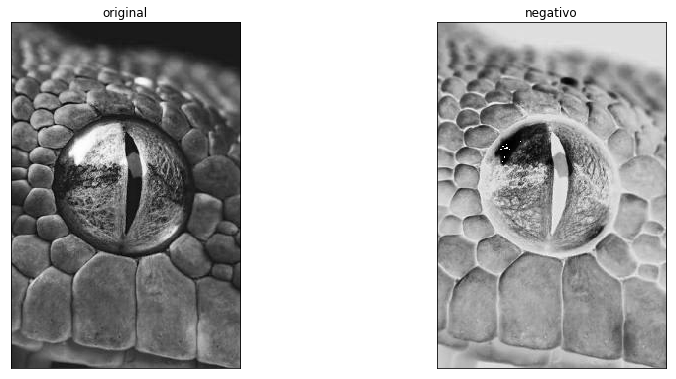

In [60]:
def negativo(l):
  img = cv2.imread('ojo.jpg', cv2.IMREAD_GRAYSCALE)
  rows, columns = img.shape
  img2 = np.zeros((rows,columns), dtype = np.uint8)
  for x in range(rows):
    for y in range(columns):
      img2[x,y]=(l-1) - img[x,y]
  mostrar2_gris(img ,img2, 'original','negativo')
  return 

negativo(255)

